<h1>TESLA STOCK PRICE PREDICTION</h1>

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import plotly.graph_objects as go
import re
import seaborn as sns

In [79]:
tesla = web.DataReader('TSLA', data_source='yahoo', start='2010-01-02', end='2020-11-30')
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [80]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-23,526.000000,501.790009,503.500000,521.849976,50260300.0,521.849976
2020-11-24,559.989990,526.200012,540.400024,555.380005,53648500.0,555.380005
2020-11-25,574.000000,545.369995,550.059998,574.000000,48930200.0,574.000000
2020-11-27,598.780029,578.450012,581.159973,585.760010,37561100.0,585.760010
2020-11-30,607.799988,554.510010,602.210022,567.599976,63003100.0,567.599976


In [81]:
tesla.reset_index(inplace=True)
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2625 entries, 0 to 2624
Data columns (total 7 columns):
Date         2625 non-null datetime64[ns]
High         2625 non-null float64
Low          2625 non-null float64
Open         2625 non-null float64
Close        2625 non-null float64
Volume       2625 non-null float64
Adj Close    2625 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 143.6 KB


In [82]:
tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [83]:
tesla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2625.000000,2625.000000,2625.000000,2625.000000,2.625000e+03,2625.000000
mean,57.202224,54.691591,55.971822,56.003476,3.037919e+07,56.003476
std,79.433685,74.987931,77.278734,77.358146,2.825141e+07,77.358146
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000
25%,7.544000,7.240000,7.328000,7.370000,1.059250e+07,7.370000
50%,45.034000,43.619999,44.363998,44.198002,2.388250e+07,44.198002
75%,61.354000,59.068001,60.200001,60.230000,3.918100e+07,60.230000
max,607.799988,578.450012,602.210022,585.760010,3.046940e+08,585.760010


In [84]:
tesla.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [85]:
tesla.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [86]:
# Candle Stick Charting
fig = go.Figure(data=[go.Candlestick(
    x=tesla['Date'],
    open=tesla['Open'], high=tesla['High'],
    low=tesla['Low'], close=tesla['Close'],
    increasing_line_color= 'cyan', decreasing_line_color= 'magenta'
)])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.update_layout(
    title='Tesla Stock Prices (2010-2020)',
    yaxis_title='Stocks',
    shapes = [dict(
        x0='2019-01-21', x1='2019-01-21', y0=0, y1=1, xref='x', yref='paper',
        line_width=2),
              dict(
        x0='2013-01-23', x1='2013-01-21', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)
             ],
    annotations=[dict(
        x='2019-01-21', y=0.04, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Drastic'),
                dict(
        x='2013-01-23', y=0.15, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Gradual')
                
                ]
)

fig.show()

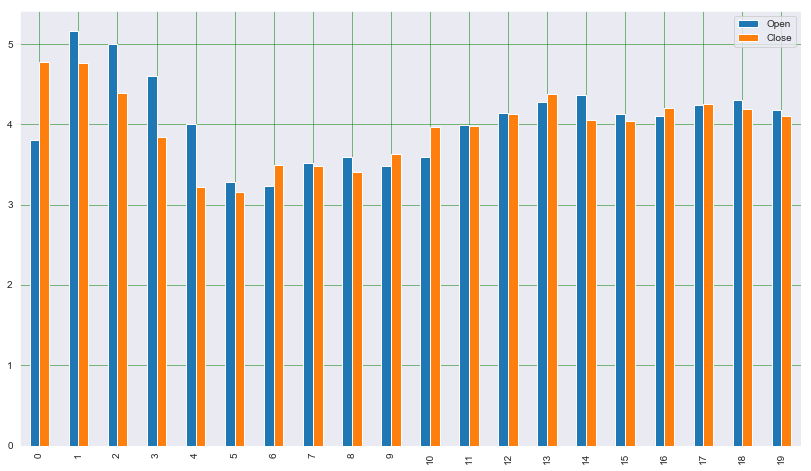

In [87]:
#Plot Open vs Close
#At the start of the year 2010

tesla[['Open','Close']].head(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

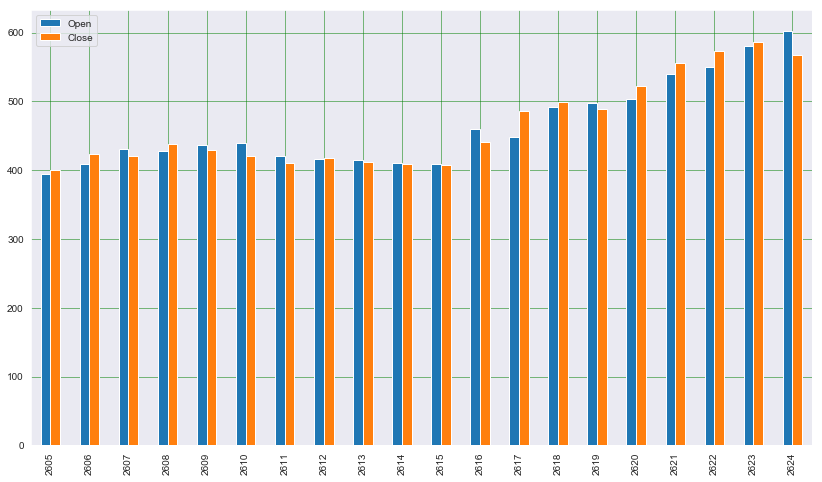

In [88]:
#At the mid of the year 2020
tesla[['Open','Close']].tail(20).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [89]:
corr = tesla.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999228,0.999512,0.999572,0.382478,0.999572
Low,0.999228,1.000000,0.999389,0.999418,0.369692,0.999418
Open,0.999512,0.999389,1.000000,0.998983,0.375593,0.998983
Close,0.999572,0.999418,0.998983,1.000000,0.376497,1.000000
Volume,0.382478,0.369692,0.375593,0.376497,1.000000,0.376497
Adj Close,0.999572,0.999418,0.998983,1.000000,0.376497,1.000000


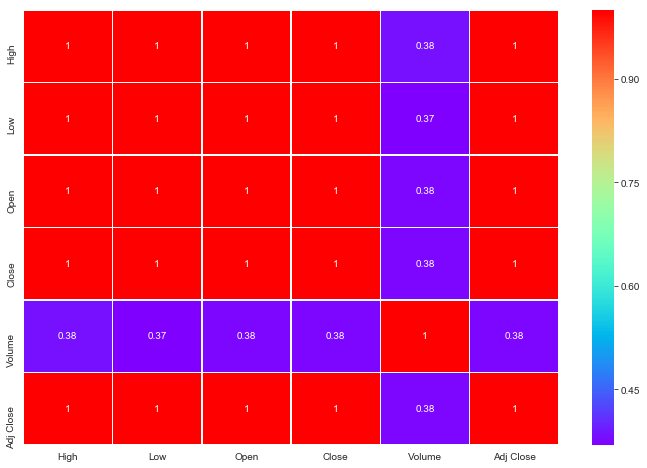

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='rainbow', annot=True, linewidth=0.5)

In [92]:
tesla['Year']=tesla['Date'].dt.year
tesla['Month']=tesla['Date'].dt.month
tesla['Day']=tesla['Date'].dt.day

In [93]:
tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778,2010,6,29
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766,2010,6,30
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392,2010,7,1
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840,2010,7,2
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222,2010,7,6


In [95]:
tesla=tesla[['Day','Month','Year','High','Open','Low','Close','Volume']]
tesla.head(10)

,Day,Month,Year,High,Open,Low,Close,Volume
0,29,6,2010,5.000,3.800,3.508,4.778,93831500.0
1,30,6,2010,6.084,5.158,4.660,4.766,85935500.0
2,1,7,2010,5.184,5.000,4.054,4.392,41094000.0
3,2,7,2010,4.620,4.600,3.742,3.840,25699000.0
4,6,7,2010,4.000,4.000,3.166,3.222,34334500.0
5,7,7,2010,3.326,3.280,2.996,3.160,34608500.0
6,8,7,2010,3.504,3.228,3.114,3.492,38557000.0
7,9,7,2010,3.580,3.516,3.310,3.480,20253000.0
8,12,7,2010,3.614,3.590,3.400,3.410,11012500.0
9,13,7,2010,3.728,3.478,3.380,3.628,13400500.0


<h3>MODEL TRAINING AND TESTING

In [96]:
X = tesla[['High', 'Low', 'Open', 'Volume']].values
Y= tesla['Close'].values

In [97]:
print(X.shape)
print(Y.shape)

(2625, 4)
(2625,)


In [98]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25,random_state=91)

In [99]:
print(x_train.shape) 
print(x_test.shape)  
print(y_train.shape)
print(y_test.shape)

(1968, 4)
(657, 4)
(1968,)
(657,)


In [100]:
#Model fitting
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
# The coefficient
print('Slope: ', lr_model.coef_)
# The Intercept
print('Intercept: ', lr_model.intercept_)

Slope:  [ 8.42370865e-01  5.43522354e-01 -3.91503080e-01 -6.03040282e-09]
Intercept:  0.20308484287178175


In [102]:
#Model_prediction
y_pred=lr_model.predict(x_test)

In [103]:
y_pred

array([ 62.87999912,  35.44516199,  73.51060416,  58.46841474,
        37.0899345 ,  42.43941599,  53.738272  ,  51.26420916,
        71.13809786,  40.63287031,  93.73508592,  43.84544992,
        67.89170366,   6.17820102,   4.50609364,  43.54360564,
         7.09959168,  74.26130179,  58.62876402,   6.57250689,
        60.211199  ,   6.4771084 ,   6.0431906 ,  50.436534  ,
        50.07827825,   5.15917606,   4.91307175,  49.45476375,
        61.8671837 ,  65.04495338, 151.48696766,  67.00017134,
         4.6164685 ,  42.39729424,  68.46460324,  58.7545478 ,
         6.44513416,  70.61917321,  37.08324738,   5.5686443 ,
       163.06991525,  51.16110835,  70.66477992,  35.50274769,
        47.03926779, 100.3287263 ,  36.43807004,  69.33119487,
        40.0313862 ,  58.70186546,   6.6522641 ,  45.28096016,
        65.48304366,  47.27746733,  68.1294574 ,  55.7348603 ,
        41.02363148,  34.31392141, 156.7545425 ,  24.31740335,
        41.07680591,   5.0760822 ,  68.2807686 ,  52.32

<h3>Evaluation Metrics

In [114]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.6358254898772074
2.578701190404743
1.605833487757913


In [113]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9996560572608806


<h3> Plot Predicted vs Actual prices

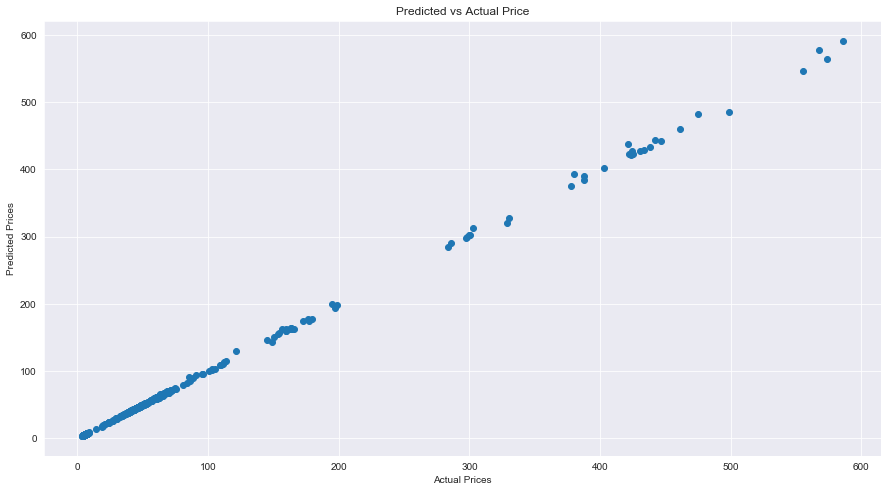

In [115]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

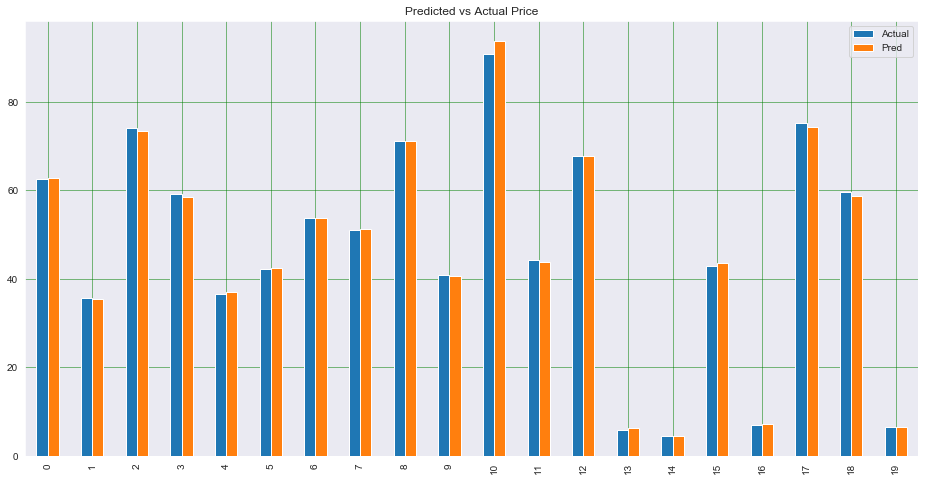

In [117]:
plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Predicted vs Actual Price')
plt.show()